In [43]:
import pandas as pd
import numpy as np

In [91]:
dataset =pd.read_csv('/content/Bengaluru_House_Data.csv')

In [45]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [46]:
dataset.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [47]:
dataset.drop(columns=['area_type','availability','society','balcony'] , inplace=True)

In [48]:
dataset.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [92]:
dataset['location'] =dataset['location'].fillna('whitefeild')

In [93]:
dataset['size'] = dataset['size'].fillna('2 BHK')

In [94]:
dataset['bath']=dataset['bath'].fillna(dataset['bath'].median())

In [51]:
dataset.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,73
price,0


In [95]:
dataset['BHK']=dataset['size'].str.get(0).astype(int)

In [53]:
dataset.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [54]:
dataset['total_sqft']

,total_sqft
0,1056
1,2600
2,1440
3,1521
4,1200
...,...
13315,3453
13316,3600
13317,1141
13318,4689


In [88]:
def range_converer(x):
    if isinstance(x, float):
        return x
    N = x.split('-')
    if len(N) == 2:
        return (float(N[0])+float(N[1]))/2
    try:
        return float(x)
    except:
        return None

In [89]:
dataset['total_sqft'] = dataset['total_sqft'].apply(range_converer)

In [57]:
dataset.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [90]:
dataset['price_per_sqft'] = (dataset['price']*100000)/dataset['total_sqft']

In [62]:
dataset.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [63]:
dataset['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [64]:
dataset['location'] = dataset['location'].apply(lambda x:x.strip())

In [65]:
location_count = dataset['location'].value_counts()

In [66]:
location_count

,count
location,
Whitefield,541
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
Thanisandra,237
...,...
Xavier Layout,1
Ramanagara Channapatna,1
Maheswari Nagar,1


In [67]:
ocation_count_less = location_count[location_count <=15]
location_count_less

,count
location,
Kodihalli,15
Benson Town,15
Nagavarapalya,15
Chamrajpet,15
Varthur Road,15
...,...
Mango Garden Layout,1
Milk Colony,1
"Basnashankari,6th stage,",1


In [68]:
dataset['location'] = dataset['location'].apply(lambda x: 'other' if x in location_count_less else x)

In [69]:
dataset['location'].value_counts()

,count
location,
other,3602
Whitefield,541
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
...,...
"Panathur Road,",1
"Electronic city phase 1,",1
"Banasawadi,",1


In [70]:
dataset.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13247.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.692610,112.565627,2.779054,7.907501e+03
std,1238.405258,1.341458,148.971674,1.169434,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,9.000000,1.200000e+07


In [71]:
dataset = dataset[(dataset['total_sqft']/dataset['BHK'])>=300]
dataset = dataset[dataset['BHK'] <= 5]
dataset = dataset[dataset['bath'] <= 5]

In [72]:
dataset.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12150.000000,12150.000000,12150.000000,12150.000000,12150.000000
mean,1531.525717,2.463457,104.108002,2.566420,6214.846106
std,1109.037512,0.856830,128.172500,0.787585,3992.787473
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1110.000000,2.000000,48.600000,2.000000,4201.680672
50%,1286.500000,2.000000,68.555000,2.000000,5272.988756
75%,1655.000000,3.000000,110.000000,3.000000,6842.458337
max,52272.000000,5.000000,2912.000000,5.000000,176470.588235


In [73]:
dataset.shape

(12150, 7)

In [75]:
dataset.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [76]:
dataset = dataset[['location', 'total_sqft' , 'BHK' , 'bath' , 'price']]

In [77]:
lower_limit=dataset['price'].mean()-dataset['price'].std()*3
upper_limit=dataset['price'].mean()+dataset['price'].std()*3
dataset['price']=np.where(dataset['price']>upper_limit,
                     upper_limit,
                     np.where(dataset['price']<lower_limit,lower_limit,dataset['price']))

In [78]:
dataset.head()

,location,total_sqft,BHK,bath,price
0,Electronic City Phase II,1056.0,2,2.0,39.07
1,Chikka Tirupathi,2600.0,4,5.0,120.00
2,Uttarahalli,1440.0,3,2.0,62.00
3,Lingadheeranahalli,1521.0,3,3.0,95.00
4,Kothanur,1200.0,2,2.0,51.00


In [79]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [80]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [102]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore') , ['location']),
        ('scaler' , StandardScaler() , ['total_sqft' ,'BHK' ,'bath'])
    ],
    remainder='passthrough'
)

In [82]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300)

In [100]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(ct , model)

In [84]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft', 'BHK',
                                                   'bath'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=300))])

In [101]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft', 'BHK',
                                                   'bath'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=300))])

In [105]:
from sklearn.metrics import r2_score
y_pred = pipe.predict(X_test)
print("R2 Score:" , r2_score(y_test ,y_pred))

R2 Score: 0.7278161778229604


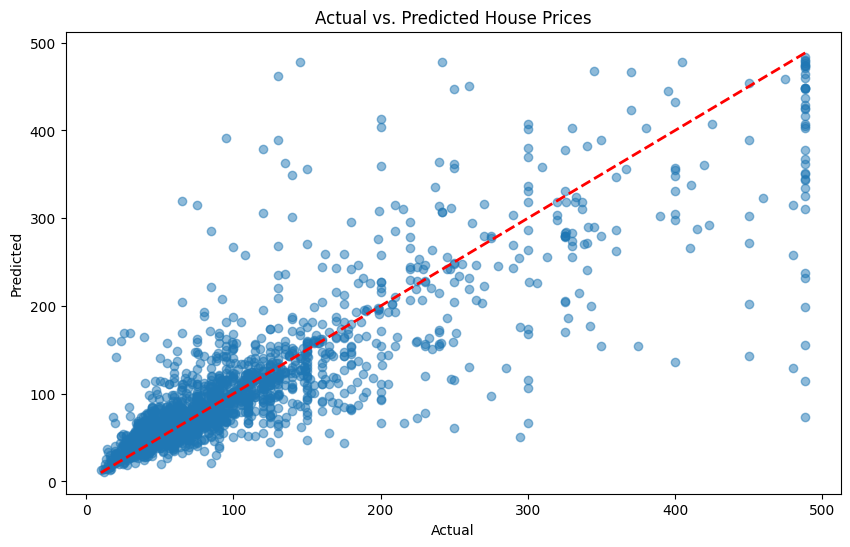

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

In [104]:
import pickle
pickle.dump(pipe , open('random_forest_house_price_model.pkl', 'wb'))
pickle.dump(dataset , open('dataset.pkl','wb'))